**Rachma Indira - DS0218**

# Import Library

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import dataset

In [2]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


# Visualisasi dengan scatter plot

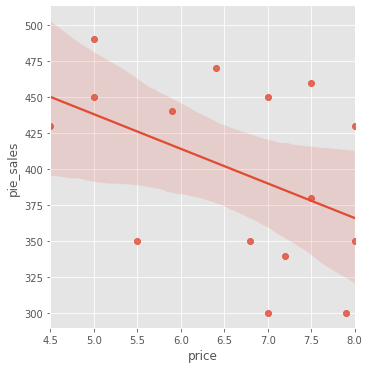

In [3]:
# Visualize the data using scatterplot
sns.lmplot(x="price", y="pie_sales", data= df_pie)

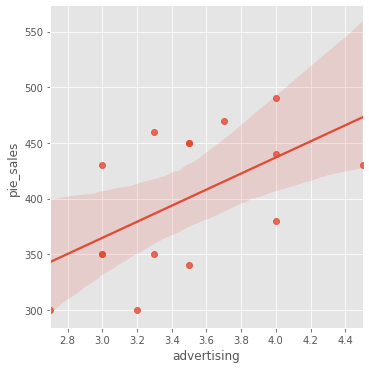

In [4]:
sns.lmplot(x="advertising", y="pie_sales", data= df_pie)

**Hasil analisis**

Y merupakan variabel dependent, Y adalah kolom pie_sales. Sedangkan variabel independen yang ada adalah Advertising dan Price

***1.   Korelasi antar variabel***

A. Korelasi dari plot pertama adalah **price terhadap pie_sales**.  Korelasi yang terjadi antara 2 variabel tersebut adalah korelasi negatif. Artinya, kedua variabel ini mengalami perubahan yang berlawanan. Dalam plot terlihat bahwa garis yang menghubungkan kedua variabel menjadi menurun. Artinya semakin tinggi price maka hasil pie_sales akan berlawanan, yaitu menurun

B. Korelasi dari plot pertama adalah **advertising terhadap pie_sales**.  Korelasi yang terjadi antara 2 variabel tersebut adalah korelasi positif. Artinya, kedua variabel ini mengalami perubahan yang bersamaan. Dalam plot terlihat bahwa garis yang menghubungkan kedua variabel menjadi naik. Artinya semakin tinggi advertising maka hasil pie_sales akan sama, yaitu naik.

***2.   Item daftar***



# Regresi Linear

In [5]:
df_pie.columns

Index(['week', 'pie_sales', 'price', 'advertising'], dtype='object')

In [6]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']

In [9]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [11]:
X['price'].mean()

6.613333333333333

In [12]:
X['advertising'].mean()

3.48

In [22]:
Y.describe()

count     15.000000
mean     399.333333
std       63.523524
min      300.000000
25%      350.000000
50%      430.000000
75%      450.000000
max      490.000000
Name: pie_sales, dtype: float64

In [17]:
# prediction with sklearn
new_price = X['price'].mean()
new_advertising = X['advertising'].mean()
print ('Predicted  house price: \n', regr.predict([[new_price, new_advertising]]))

Predicted  house price: 
 [399.33333333]


In [18]:
X = sm.add_constant(X) # adding a constant

In [19]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        21:16:46   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

***Hasil Analisis***



1.   Hal pertama yang saya coba untuk analisis adalah mengenai intercepet dan koefisien. Dan berikut adalah hasil analisis yangs aya dapatkan :

A. **Intercept** merupakan nilai yang didapat apabila kita mempunyai nilai semua variabel independen(X1,X2) adalah 0 maka berapa nilai variabel dependen(Y). Hal ini berfungsi untuk melihat seberapa besar pengaruh variabel independen yang ada. Jika dilihat, nilai minimum dari Y adalah 300 dan nilai max nya adalah 490, sedangkan nilai interceptnya adalah 306.5 . Sehingga dapat kita simpulkan, pengaruh dari variabel independen terhadap variabel dependen sangatlah berpengaruh, karena dapat meningkat penjualan yang awalnya 300 dan dapat naik hingga 490. Sekecil-kecilnya pengaruh variabel independen saja dapat meningkatkan pie_sales di angka 306. Jika dapat memanfaatkan informasi yang sebelumnya didapat, yaitu korelasi antar variabel, dipastikan nilai pie_sales akan naik secara pesat


B. **Coefficient** merupakan nilai yang mengkalikan prediktor(kolom prediksi, dalam kasus ini adalah pie_Sales). Jadi coefficient ini melihat bagaimana pengaruh dari adanya variabel independet. Jika dilihat dalam kasus ini untuk kolom price adalah -24.97508952 dan kolom advertising 74.13095749. Untuk kolom price disebut dengan *negative sign* yang artinya jika nilai prediktor naik maka variabel X(price) akan menurun, begitu juga sebaliknya. Sedangkan untuk kolom advertising disebut dengan *positive sign* yang artinya jika nilai prediktor naik maka variabel X(advertising) juga akan naik, begitu juga sebaliknya.

2.   Berikut adalah hasil analisis dari OLS Regression

A. **R-squared** yaitu untuk melihat pengaruh dari variabel independen(X) terhadap variabel dependen(Y). Jika dilihat, hasil dari R-squared nya adalah 0.521 atau 52.1%. Angka tersebut mengandung arti bahwa variabel independen(yaitu advertising dan price)  secara bersama-sama berpengaruh terhadap nilai variabel dependen(pie_Sales)

B. **Adj. R-squared** yaitu modifikasi dari r-square. Perbedaan antara r-squared dan adj r-squared adalah dari variabel yang digunakan. Dari beberapa sumber yang saya baca, jika variabel independen yang kita gunakan >= 2. Maka disarankan untuk menggunakan r-squared saja. Karena pada adj r-squared menyesuaikan pada statistik berdasarkan jumlah variabel independen dalam model.

C. **Prob(F-Static)** yaitu untuk menilai pengaruh simultan  dari dependen variabel terhadap variabel independen, apakah bermakna secara statistik atau tidak. Jika nilai p value kurang dari batas kritis misalnya 0,05  maka menerima H1 atau yang berarti pengaruh simultan variabel prediktor terhadap variabel response terbukti bermakna secara statistik. Begitu sebaliknya jika nilai p value lebih dari batas kritis maka menerima H0 atau yang berarti pengaruh simultan variabel dependen terhadap variabel independe tidak terbukti bermakna secara statistik. Pada kasus ini nilain prob(f-static) adalah 0.0120 yang artinya **pengaruh dari dependen variabel terhadap independen variabel tidak terbukti bermakna secara statik**

D. **AIC/BIC** yaitu metode yang dapat digunakan untuk memilih model regresi
terbaik

E. **Prob(Omnibus)** yaitu pada OLS ada salah satu asumsi adalah bahwa kesalahan dapat terdistribusi secara normal. Maka semakin kecil nilai omnibus, akan menghasilkan prediksi yang bagus karena artinya nilai error yang ada lebih sedikit. Pada kasus ini, nilai omnibusnya adalah 0.471 atau 47.1% yang artinya cukup tinggi

F. **Durbin watson** adalah sebuah test yang digunakan untuk mendeteksi terjadinya autokorelasi pada nilai residual (prediction errors) dari sebuah analisis regresi. Yang dimaksud dengan Autokorelasi adalah “hubungan antara nilai-nilai yang dipisahkan satu sama lain dengan jeda waktu tertentu”. Pada kasus ini, nilai durbin watson nya adalah 1.683 

G. **Prob(Jarque-Bera)** yaitu suatu metod untuk menguji normalitas. pada kasus ini nilainya adalah 0.937 atau 93.7%

